<a href="https://colab.research.google.com/github/BrotherKim/Colab/blob/main/SEP592/BK_resnet50_BRCA_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


# Dataset download
datasets<br>
    &emsp;&emsp;└── test_set<br>
    &emsp;&emsp;│   &emsp;&emsp;├── cats<br>
    &emsp;&emsp;│   &emsp;&emsp;│   &emsp;&emsp;└── datas...<br>
    &emsp;&emsp;│   &emsp;&emsp;└── dogs<br>
    &emsp;&emsp;│       &emsp;&emsp;&emsp;&emsp;&emsp;└── datas...<br>
    &emsp;&emsp;└── training_set<br>
        &emsp;&emsp;&emsp;&emsp;├── cats<br>
        &emsp;&emsp;&emsp;&emsp;│   &emsp;&emsp;└── datas...<br>
        &emsp;&emsp;&emsp;&emsp;└── dogs<br>
            &emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;└── datas...<br>


In [ ]:
!pip install kaggle

In [ ]:
!mkdir -p ~/.kaggle
!cp /content/gdrive/MyDrive/KAIST/kaggle.json ~/.kaggle

!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d tongpython/cat-and-dog
!mkdir datasets
!unzip /content/cat-and-dog.zip -d /content/datasets
!mv /content/datasets/test_set /content/datasets/test_set_legacy
!mv /content/datasets/test_set_legacy/test_set /content/datasets/test_set
!mv /content/datasets/training_set /content/datasets/training_set_legacy
!mv /content/datasets/training_set_legacy/training_set /content/datasets/training_set
!rm -rf /content/datasets/*_set_legacy

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
  inflating: /content/datasets/training_set/training_set/cats/cat.3704.jpg  
  inflating: /content/datasets/training_set/training_set/cats/cat.3705.jpg  
  inflating: /content/datasets/training_set/training_set/cats/cat.3706.jpg  
  inflating: /content/datasets/training_set/training_set/cats/cat.3707.jpg  
  inflating: /content/datasets/training_set/training_set/cats/cat.3708.jpg  
  inflating: /content/datasets/training_set/training_set/cats/cat.3709.jpg  
  inflating: /content/datasets/training_set/training_set/cats/cat.371.jpg  
  inflating: /content/datasets/training_set/training_set/cats/cat.3710.jpg  
  inflating: /content/datasets/training_set/training_set/cats/cat.3711.jpg  
  inflating: /content/datasets/training_set/training_set/cats/cat.3712.jpg  
  inflating: /content/datasets/training_set/training_set/cats/cat.3713.jpg  
  inflating: /content/datasets/training_set/training_set/cats/cat.3714.jpg  
  inflating: /content/datasets/training_s

# Data Load

In [8]:
!ls -l /content/gdrive/MyDrive/KAIST/dataset/test_set

ls: cannot access '/content/gdrive/MyDrive/KAIST/datasets/test_set': No such file or directory


In [9]:
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# 위노그라드 알고리즘 설정
os.environ['TF_ENABLE_WINOGRAD_NONFUSED'] = '1'

#rootPath = '/content/datasets'
rootPath = '/content/gdrive/MyDrive/KAIST/dataset'

imageGenerator = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    brightness_range=[.2, .2],
    horizontal_flip=True,
    validation_split=.1
)

trainGen = imageGenerator.flow_from_directory(
    os.path.join(rootPath, 'train_set'),
    target_size=(224, 224),
    subset='training'
)

validationGen = imageGenerator.flow_from_directory(
    os.path.join(rootPath, 'train_set'),
    target_size=(224, 224),
    subset='validation'
)

Found 21093 images belonging to 2 classes.
Found 2342 images belonging to 2 classes.


# 모델 구성 및 finetuning

In [10]:
INPUT_SHAPE = (224, 224, 3)
NUM_CLASSES = 2

In [11]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers

baseModel = ResNet50(include_top=False, weights='imagenet', input_shape=INPUT_SHAPE, classes=NUM_CLASSES)
#baseMode =ResNet50(include_top=True, weights=None, input_shape=INPUT_SHAPE, classes=NUM_CLASSES)

baseModel.summary()

94773248/94765736 [==============================] - 1s 0us/step
Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
__________________________

In [12]:
for i, l in enumerate(baseModel.layers):
  print(i, l.name)

0 input_1
1 conv1_pad
2 conv1_conv
3 conv1_bn
4 conv1_relu
5 pool1_pad
6 pool1_pool
7 conv2_block1_1_conv
8 conv2_block1_1_bn
9 conv2_block1_1_relu
10 conv2_block1_2_conv
11 conv2_block1_2_bn
12 conv2_block1_2_relu
13 conv2_block1_0_conv
14 conv2_block1_3_conv
15 conv2_block1_0_bn
16 conv2_block1_3_bn
17 conv2_block1_add
18 conv2_block1_out
19 conv2_block2_1_conv
20 conv2_block2_1_bn
21 conv2_block2_1_relu
22 conv2_block2_2_conv
23 conv2_block2_2_bn
24 conv2_block2_2_relu
25 conv2_block2_3_conv
26 conv2_block2_3_bn
27 conv2_block2_add
28 conv2_block2_out
29 conv2_block3_1_conv
30 conv2_block3_1_bn
31 conv2_block3_1_relu
32 conv2_block3_2_conv
33 conv2_block3_2_bn
34 conv2_block3_2_relu
35 conv2_block3_3_conv
36 conv2_block3_3_bn
37 conv2_block3_add
38 conv2_block3_out
39 conv3_block1_1_conv
40 conv3_block1_1_bn
41 conv3_block1_1_relu
42 conv3_block1_2_conv
43 conv3_block1_2_bn
44 conv3_block1_2_relu
45 conv3_block1_0_conv
46 conv3_block1_3_conv
47 conv3_block1_0_bn
48 conv3_block1_3_bn

In [13]:
from keras.models import Model
from tensorflow.keras.layers import Flatten, Dropout, Conv2D, MaxPooling2D, Dense, BatchNormalization

x = baseModel.output
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Flatten()(x)
x = Dropout(0.5)(x)
x = Dense(512, activation='relu', input_dim=INPUT_SHAPE)(x)
x = BatchNormalization()(x)
x = Dense(256, activation ='relu')(x)
x = BatchNormalization()(x)
x = Dense(NUM_CLASSES, activation='softmax')(x)

model = Model(
    inputs=baseModel.input
    , outputs=x
    )

model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Total params: 33,160,322
Trainable params: 33,105,666
Non-trainable params: 54,656
__________________________________________________________________________________________________


In [14]:
NUM_FREEZE = 100

for l in baseModel.layers:
  l.trainable = False

for l in baseModel.layers[NUM_FREEZE:]:
  l.trainable = True


In [15]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy', 
    metrics=['acc'],
)

In [17]:
#epochs = 32
#history = model.fit_generator(
#    trainGen, 
#    epochs=epochs,
#    steps_per_epoch=trainGen.samples / epochs, 
#    validation_data=validationGen,
#    validation_steps=trainGen.samples / epochs,
#)
epochs = 10
steps = 20
history = model.fit_generator(
    trainGen, 
    epochs=epochs,
    steps_per_epoch=steps, 
    validation_data=validationGen,
    validation_steps=steps,
)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1915: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
20/20 [==============================] - 605s 30s/step - loss: 3.5782 - acc: 0.6922 - val_loss: 0.6833 - val_acc: 0.8000
Epoch 2/10
20/20 [==============================] - 584s 31s/step - loss: 0.5757 - acc: 0.7744 - val_loss: 0.5133 - val_acc: 0.7937
Epoch 3/10
20/20 [==============================] - 582s 31s/step - loss: 0.5768 - acc: 0.7500 - val_loss: 0.7301 - val_acc: 0.7688
Epoch 4/10
20/20 [==============================] - 425s 22s/step - loss: 0.6406 - acc: 0.7484 - val_loss: 0.5075 - val_acc: 0.7948
Epoch 5/10
20/20 [==============================] - 281s 15s/step - loss: 0.5626 - acc: 0.7583 - val_loss: 0.5316 - val_acc: 0.7797
Epoch 6/10
20/20 [==============================] - 287s 15s/step - loss: 0.4864 - acc: 0.8294 - val_loss: 0.5479 - val_acc: 0.7766
Epoch 7/10
20/20 [==============================] - 292s 15s/step - loss: 0.5596 - acc: 0.7670 - val_loss: 0.5162 - val_acc: 0.7937
Epoch 8/10
20/20 [==============================] - 285s 15s/step - loss: 0.

#학습 결과 시각화

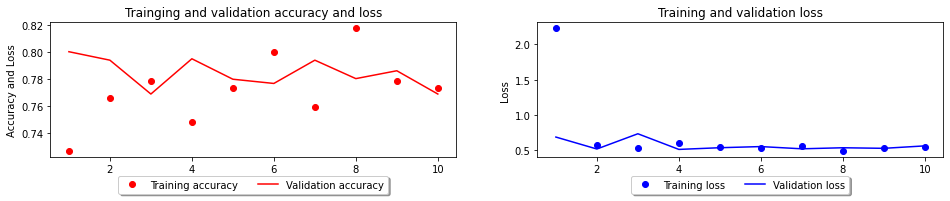

In [18]:
import matplotlib.pyplot as plt

def show_graph(history_dict):
    accuracy = history_dict['acc']
    val_accuracy = history_dict['val_acc']
    loss = history_dict['loss']
    val_loss = history_dict['val_loss']

    epochs = range(1, len(loss) + 1)
    
    plt.figure(figsize=(16, 1))
    
    plt.subplot(121)
    plt.subplots_adjust(top=2)
    plt.plot(epochs, accuracy, 'ro', label='Training accuracy')
    plt.plot(epochs, val_accuracy, 'r', label='Validation accuracy')
    plt.title('Trainging and validation accuracy and loss')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy and Loss')

    plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1),
              fancybox=True, shadow=True, ncol=5)
#     plt.legend(bbox_to_anchor=(1, -0.1))

    plt.subplot(122)
    plt.plot(epochs, loss, 'bo', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1),
          fancybox=True, shadow=True, ncol=5)
#     plt.legend(bbox_to_anchor=(1, 0))

    plt.show()
show_graph(history.history)


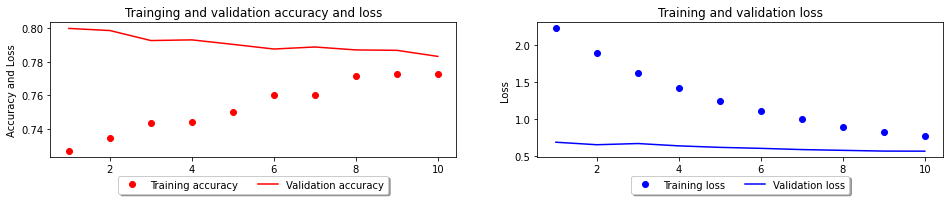

In [19]:
def smooth_curve(points, factor=.8):
    smoothed_points = []
    for point in points:
        if smoothed_points:
            previous = smoothed_points[-1]
            smoothed_points.append(previous * factor + point * (1 - factor))
        else:
            smoothed_points.append(point)
    return smoothed_points
smooth_data = {}
for key, val in history.history.items():
    smooth_data[key] = smooth_curve(val)
show_graph(smooth_data)


#모델 중간평가

In [22]:
testGenerator = ImageDataGenerator(
    rescale=1./255
)

testGen = imageGenerator.flow_from_directory(
    os.path.join(rootPath, 'test_set'),
    target_size=(224, 224),
)

#model.evaluate_generator(testGen)
model.evaluate(testGen)

Found 9816 images belonging to 2 classes.
    138/Unknown - 1552s 11s/step - loss: 0.5186 - acc: 0.8191

KeyboardInterrupt: ignored

#모델 추가 학습

In [27]:
#epochs = 32
#history = model.fit_generator(
#    trainGen, 
#    epochs=epochs,
#    steps_per_epoch=trainGen.samples / epochs, 
#    validation_data=validationGen,
#    validation_steps=trainGen.samples / epochs,
#)

#from keras.callbacks import EarlyStopping
#early_stopping = EarlyStopping(patience=1, min_delta=-0.02)

epochs = 10
steps = 20
history = model.fit_generator(
    trainGen, 
    epochs=epochs,
    steps_per_epoch=steps, 
    validation_data=validationGen,
    validation_steps=steps,
#    callbacks=[early_stopping],
)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1915: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
20/20 [==============================] - 280s 15s/step - loss: 0.5165 - acc: 0.7906 - val_loss: 0.5329 - val_acc: 0.7899
Epoch 2/10
20/20 [==============================] - 285s 15s/step - loss: 0.5487 - acc: 0.7734 - val_loss: 0.5164 - val_acc: 0.7937
Epoch 3/10
20/20 [==============================] - 285s 15s/step - loss: 0.5210 - acc: 0.8078 - val_loss: 0.5534 - val_acc: 0.7750
Epoch 4/10
20/20 [==============================] - 288s 15s/step - loss: 0.4674 - acc: 0.8250 - val_loss: 0.5047 - val_acc: 0.7997
Epoch 5/10
20/20 [==============================] - 284s 15s/step - loss: 0.5483 - acc: 0.7672 - val_loss: 0.4991 - val_acc: 0.8031
Epoch 6/10
20/20 [==============================] - 286s 15s/step - loss: 0.5489 - acc: 0.7672 - val_loss: 0.5131 - val_acc: 0.8000
Epoch 7/10
20/20 [==============================] - 284s 15s/step - loss: 0.5403 - acc: 0.7750 - val_loss: 0.7939 - val_acc: 0.7500
Epoch 8/10
20/20 [==============================] - 285s 15s/step - loss: 0.

In [29]:
#epochs = 32
#history = model.fit_generator(
#    trainGen, 
#    epochs=epochs,
#    steps_per_epoch=trainGen.samples / epochs, 
#    validation_data=validationGen,
#    validation_steps=trainGen.samples / epochs,
#)

#from keras.callbacks import EarlyStopping
#early_stopping = EarlyStopping(patience=1, min_delta=-0.02)

epochs = 20
steps = 20
history = model.fit_generator(
    trainGen, 
    epochs=epochs,
    steps_per_epoch=steps, 
    validation_data=validationGen,
    validation_steps=steps,
#    callbacks=[early_stopping],
)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1915: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
20/20 [==============================] - 281s 15s/step - loss: 0.5227 - acc: 0.7844 - val_loss: 0.5404 - val_acc: 0.7720
Epoch 2/20
20/20 [==============================] - 291s 15s/step - loss: 0.4906 - acc: 0.8109 - val_loss: 0.5210 - val_acc: 0.7859
Epoch 3/20
20/20 [==============================] - 297s 15s/step - loss: 0.5085 - acc: 0.7953 - val_loss: 0.5151 - val_acc: 0.7937
Epoch 4/20
20/20 [==============================] - 305s 16s/step - loss: 0.4994 - acc: 0.8031 - val_loss: 0.5139 - val_acc: 0.7906
Epoch 5/20
20/20 [==============================] - 309s 16s/step - loss: 0.5198 - acc: 0.7891 - val_loss: 0.5490 - val_acc: 0.7671
Epoch 6/20
20/20 [==============================] - 303s 16s/step - loss: 0.5298 - acc: 0.7875 - val_loss: 0.5352 - val_acc: 0.7734
Epoch 7/20
20/20 [==============================] - 304s 16s/step - loss: 0.5200 - acc: 0.7875 - val_loss: 0.5478 - val_acc: 0.7703
Epoch 8/20
20/20 [==============================] - 310s 16s/step - loss: 0.

#추가 학습 결과 시각화

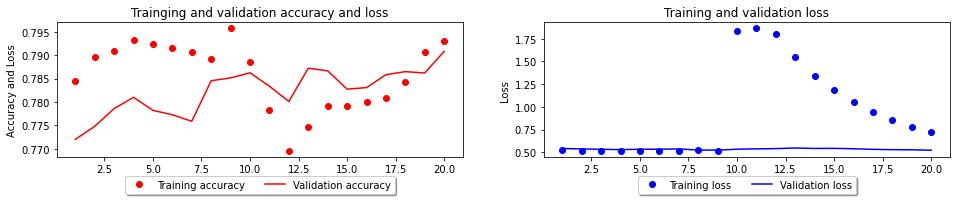

In [30]:
smooth_data = {}
for key, val in history.history.items():
    smooth_data[key] = smooth_curve(val)
show_graph(smooth_data)